In [19]:
import pandas as pd

In [5]:
import torch 

m = torch.load('/mnt/storage/Devam/mammo-clip-github/checkpoints/RSNA/Classifier/upmc_breast_clip_det_b5_period_n_lp/lr_5e-05_epochs_30_weighted_BCE_y_BIRADS_data_frac_1.0/upmc_breast_clip_det_b5_period_n_lp_seed_10_fold0_best_acc_cancer_ver084.pth')
print(m.keys())

dict_keys(['model', 'predictions', 'epoch', 'accuracy', 'f1'])


In [ ]:
python ./src/preprocessing/preprocess_image_to_png_kaggle.py --phase="train" --base_folder="/mnt/storage/breast_cancer_kaggle"



In [ ]:
kaggle datasets download -d shantanughosh/vindr-mammogram-dataset-dicom-to-png

## Mass Classification with Fine-tuning

In [ ]:
python ./src/codebase/train_classifier.py 
  --tensorboard-path '/mnt/storage/Devam/mammo-clip-github/tensorboard_logs'
  --checkpoints '/mnt/storage/Devam/mammo-clip-github/checkpoints'
  --output_path '/mnt/storage/Devam/mammo-clip-github/output'
  --data-dir '/mnt/storage/breast_cancer_kaggle/mammo_clip' 
  --img-dir '/mnt/storage/Devam/mammo-clip-github/images_png' 
  --csv-file '/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/data_csv/vindr_detection_v1_folds.csv' 
  --clip_chk_pt_path "/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar" 
  --data_frac 1.0 
  --dataset 'ViNDr' 
  --arch 'upmc_breast_clip_det_b5_period_n_ft' 
  --label "Mass" 
  --epochs 30 
  --batch-size 8 
  --num-workers 0 
  --print-freq 10000 
  --log-freq 500 
  --running-interactive 'n' 
  --n_folds 1 
  --lr 5.0e-5 
  --weighted-BCE 'y' 
  --balanced-dataloader 'n'

In [1]:
%cd /mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase

/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase


In [2]:
from Classifiers.models.breast_clip_classifier import BreastClipClassifier

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.12 (you have 1.4.7). Upgrade using: pip install --upgrade albumentations
/home/devam/miniconda3/envs/Mammo-CLIP/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ckpt = '/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar'
n_class = 1

In [4]:
import torch
model = torch.load(ckpt,map_location="cpu")

In [10]:
new_dict = {'config': model['config']}
# Save the dictionary to a file
torch.save(new_dict, 'new_dict.pt')

# Load the dictionary from the file
loaded_dict = torch.load('new_dict.pt')
print(loaded_dict)

{'config': {'base': {'period': 'n', 'resume_training': False, 'epoch_to_start': 0, 'train_fast': False, 'fold': 0, 'seed': 10, 'amp': True, 'mean': 0.3089279, 'std': 0.25053555408335154, 'image_size_h': 1520, 'image_size_w': 912, 'text_max_length': 256, 'loss_best': 'contrastive', 'data_frac': 1.0, 'zs_prompts': {'upmc': ['birads category 0', 'birads category 1', 'birads category 2'], 'rsna': ['no malignancy', 'malignancy']}, 'output': {'args_path': '/ocean/projects/asc170022p/shg121/PhD/Breast-CLIP/src/codebase/outputs/upmc_clip/b5_detector_period_n', 'checkpoint': '/ocean/projects/asc170022p/shg121/PhD/Breast-CLIP/src/codebase/outputs/upmc_clip/b5_detector_period_n/checkpoints/', 'tensorboard': '/ocean/projects/asc170022p/shg121/PhD/Breast-CLIP/src/codebase/outputs/upmc_clip/b5_detector_period_n/tensorboard/'}}, 'data_train': {'upmc_wo_period': {'name': 'upmc', 'data_type': 'imagetext', 'data_dir': '/ocean/projects/asc170022p/shg121/PhD/RSNA_Breast_Imaging/Dataset', 'img_dir': 'Exter

'/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase'

In [5]:
model['config']['']

{'base': {'period': 'n',
  'resume_training': False,
  'epoch_to_start': 0,
  'train_fast': False,
  'fold': 0,
  'seed': 10,
  'amp': True,
  'mean': 0.3089279,
  'std': 0.25053555408335154,
  'image_size_h': 1520,
  'image_size_w': 912,
  'text_max_length': 256,
  'loss_best': 'contrastive',
  'data_frac': 1.0,
  'zs_prompts': {'upmc': ['birads category 0', 'birads category 1', 'birads category 2'],
   'rsna': ['no malignancy', 'malignancy']},
  'output': {'args_path': '/ocean/projects/asc170022p/shg121/PhD/Breast-CLIP/src/codebase/outputs/upmc_clip/b5_detector_period_n',
   'checkpoint': '/ocean/projects/asc170022p/shg121/PhD/Breast-CLIP/src/codebase/outputs/upmc_clip/b5_detector_period_n/checkpoints/',
   'tensorboard': '/ocean/projects/asc170022p/shg121/PhD/Breast-CLIP/src/codebase/outputs/upmc_clip/b5_detector_period_n/tensorboard/'}},
 'data_train': {'upmc_wo_period': {'name': 'upmc',
   'data_type': 'imagetext',
   'data_dir': '/ocean/projects/asc170022p/shg121/PhD/RSNA_Breast_

In [ ]:
args = {'arch': 'upmc_breast_clip_b5_period_n_lp'}
model = BreastClipClassifier(ckpt=model, n_class=n_class,args=args)


In [23]:
model["config"]["model"]["image_encoder"]

{'source': 'cnn',
 'name': 'tf_efficientnet_b5_ns-detect',
 'pretrained': True,
 'model_type': 'cnn'}

## RSNA Cancer Classification with Linear Probing


In [ ]:
python ./src/codebase/train_classifier.py 
  --tensorboard-path '/mnt/storage/Devam/mammo-clip-github/tensorboard_logs'
  --checkpoints '/mnt/storage/Devam/mammo-clip-github/checkpoints'
  --output_path '/mnt/storage/Devam/mammo-clip-github/output'
  --data-dir '/mnt/storage/breast_cancer_kaggle/mammo_clip' 
  --img-dir 'train_images_png' 
  --csv-file '/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/data_csv/train_folds.csv' 
  --clip_chk_pt_path "/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar" 
  --data_frac 1.0 
  --dataset 'RSNA' 
  --arch 'upmc_breast_clip_det_b5_period_n_lp' 
  --label "cancer" 
  --epochs 30 
  --batch-size 8 
  --num-workers 0 
  --print-freq 10000 
  --log-freq 500 
  --running-interactive 'n' 
  --n_folds 1 
  --lr 5.0e-5 
  --weighted-BCE 'y' 
  --balanced-dataloader 'n'

## Check modify data set csv RSNA

In [1]:
import pandas as pd

df = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/data_csv/train_folds.csv')
print(df.columns)


Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case', 'fold'],
      dtype='object')


In [60]:
df.image_id.nunique()

54706

In [6]:
df[df['patient_id'] == 65530]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,fold
51506,1,65530,633167749,L,MLO,48.0,0,0,0,NaN,0,C,49,False,3
51507,1,65530,1277826488,L,CC,48.0,0,0,0,NaN,0,C,49,False,3
51508,1,65530,1627492472,L,MLO,48.0,0,0,0,NaN,0,C,49,False,3
51509,1,65530,675828643,R,MLO,48.0,0,1,0,0.0,0,C,49,True,3
51510,1,65530,1039644878,R,CC,48.0,0,1,0,0.0,0,C,49,True,3
51511,1,65530,1401303823,R,MLO,48.0,0,1,0,0.0,0,C,49,True,3


In [66]:
df[df['patient_id'] == 25]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,fold
14038,1,25,1442180348,L,MLO,62.0,0,0,0,1.0,0,B,49,False,1
14039,1,25,1789648218,L,CC,62.0,0,0,0,1.0,0,B,49,False,1
14040,1,25,822390278,R,CC,62.0,0,0,0,1.0,0,B,49,False,1
14041,1,25,1723979573,R,MLO,62.0,0,0,0,1.0,0,B,49,False,1
14042,1,25,1962456803,R,MLO,62.0,0,0,0,1.0,0,B,49,False,1
14043,1,25,1997933901,R,CC,62.0,0,0,0,1.0,0,B,49,False,1


In [2]:
cleaned_df = df.dropna()

In [8]:
# Step 1: Group by patient ID and view, then apply a custom function to calculate combinations
def calculate_combinations(group):
    # Count unique image IDs for L and R within the group
    l_count = group[group['laterality'] == 'L']['image_id'].nunique()
    r_count = group[group['laterality'] == 'R']['image_id'].nunique()
    # The number of L+R combinations is the min of l_count and r_count
    return l_count*r_count

combinations_per_view = cleaned_df.groupby(['patient_id', 'view']).apply(calculate_combinations)
combinations_per_view

patient_id  view
25          CC      2
            MLO     2
28          CC      0
            MLO     0
33          CC      2
                   ..
65495       MLO     1
65530       CC      0
            MLO     0
65534       CC      1
            MLO     1
Length: 11621, dtype: int64

In [10]:
# Step 1: Group by patient ID and view, then apply a custom function to calculate combinations
def calculate_combinations(group):
    # Count unique image IDs for L and R within the group
    l_count = group[group['laterality'] == 'L']['image_id'].nunique()
    r_count = group[group['laterality'] == 'R']['image_id'].nunique()
    # The number of L+R combinations is the min of l_count and r_count
    return l_count*r_count

combinations_per_view1 = df.groupby(['patient_id', 'view']).apply(calculate_combinations)
combinations_per_view1

patient_id  view
5           CC      1
            MLO     1
25          CC      2
            MLO     2
28          CC      1
                   ..
65526       MLO     1
65530       CC      1
            MLO     4
65534       CC      1
            MLO     1
Length: 23854, dtype: int64

In [16]:
print(' MLO raw:', combinations_per_view1.loc[:,'MLO'].sum() , 'cleaned :', combinations_per_view.loc[:,'MLO'].sum())

 MLO raw: 17471 cleaned : 6464


In [17]:
print('CC raw :', combinations_per_view1.loc[:,'CC'].sum() , 'cleaned :', combinations_per_view.loc[:,'CC'].sum())

CC raw : 15908 cleaned : 5679


In [20]:
mlo_cc_sum = combinations_per_view1.loc[:,'MLO'].sum() + combinations_per_view1.loc[:,'CC'].sum()
print('MLO + CC raw:', mlo_cc_sum, 'cleaned:', combinations_per_view.loc[:,'MLO'].sum() + combinations_per_view.loc[:,'CC'].sum())

MLO + CC raw: 33379 cleaned: 12143


In [ ]:
# combinations_per_view[~combinations_per_view.index.get_level_values('view').isin(['MLO', 'CC'])]

total patients

In [18]:
unique_features.patient_id.nunique()

11913

In [25]:
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,fold
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,1
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,1
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,1
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,1
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False,0
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False,2
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False,2
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True,2


Check if null values of BIRADS and Density Intersect

In [11]:
count = df[~df['density'].isnull() & df['BIRADS'].isnull()].shape[0]
count

5794

if we remove all the CC views, we have : 

In [34]:
df[df['view'] == 'MLO'].groupby('patient_id')['view'].value_counts().mean()

2.34223117602619

In [33]:
patient_id_with_different_birads = df.groupby('patient_id')['BIRADS'].nunique().loc[lambda x: x > 1].index.tolist()
patient_id_with_different_birads

[]

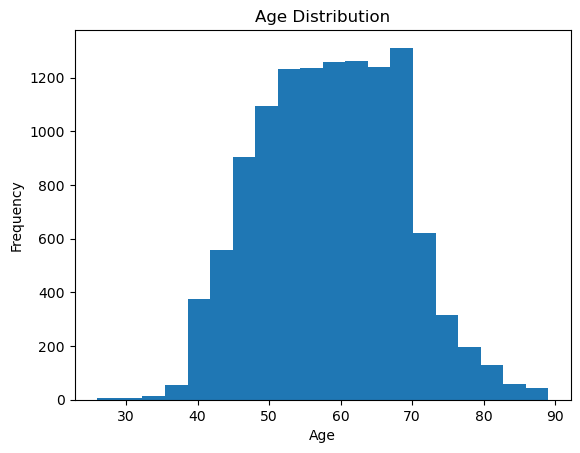

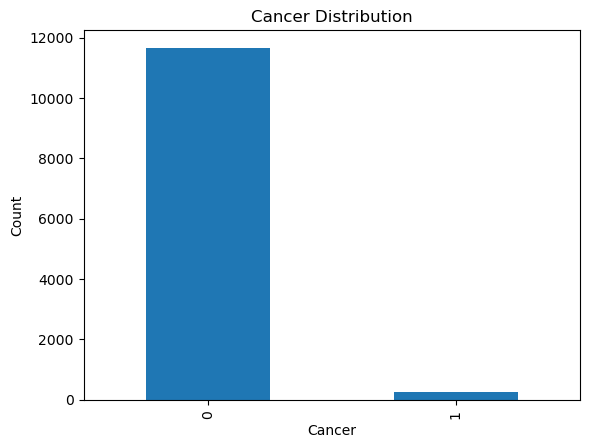

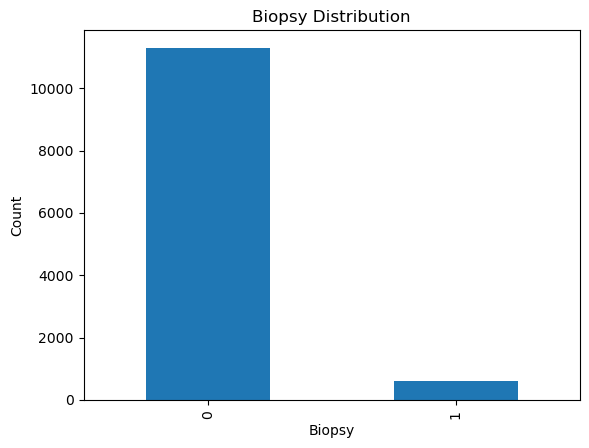

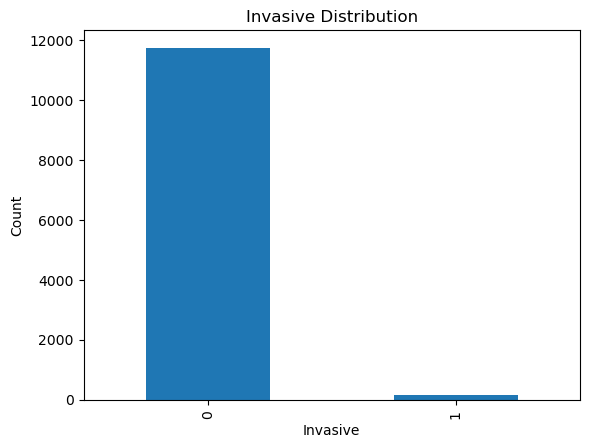

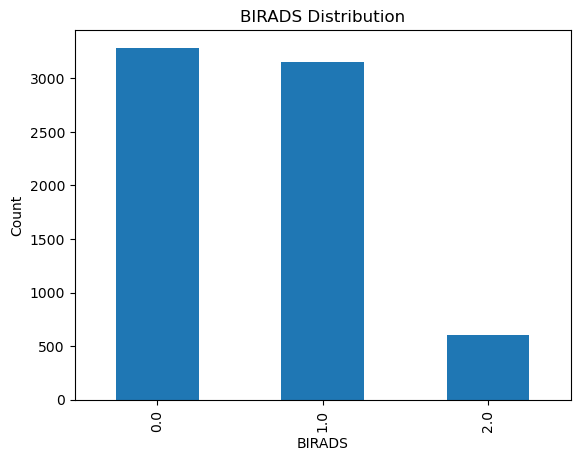

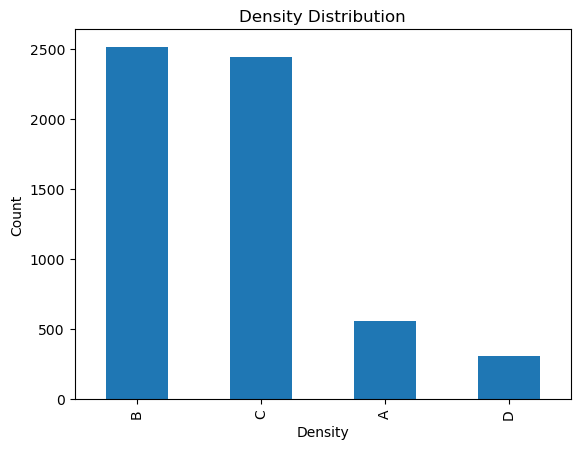

In [9]:
import matplotlib.pyplot as plt

# Plotting the age distribution
unique_features = df.groupby('patient_id').first().reset_index()

unique_features['age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Plotting the cancer distribution
unique_features['cancer'].value_counts().plot(kind='bar')
plt.xlabel('Cancer')
plt.ylabel('Count')
plt.title('Cancer Distribution')
plt.show()

# Plotting the biopsy distribution
unique_features['biopsy'].value_counts().plot(kind='bar')
plt.xlabel('Biopsy')
plt.ylabel('Count')
plt.title('Biopsy Distribution')
plt.show()

# Plotting the invasive distribution
unique_features['invasive'].value_counts().plot(kind='bar')
plt.xlabel('Invasive')
plt.ylabel('Count')
plt.title('Invasive Distribution')
plt.show()

# Plotting the BIRADS distribution
unique_features['BIRADS'].value_counts().plot(kind='bar')
plt.xlabel('BIRADS')
plt.ylabel('Count')
plt.title('BIRADS Distribution')
plt.show()

# Plotting the density distribution
unique_features['density'].value_counts().plot(kind='bar')
plt.xlabel('Density')
plt.ylabel('Count')
plt.title('Density Distribution')
plt.show()

### Data Cleaning 

In [2]:
for i in df.columns:
    print(df[i].value_counts())
# print(df['laterality'].value_counts(),df['view'].value_counts(),df['density'].value_counts())


site_id
1    29519
2    25187
Name: count, dtype: int64
patient_id
52868    14
55706    14
9795     13
51115    13
5421     13
         ..
32743     4
32751     4
32763     4
32770     4
9989      4
Name: count, Length: 11913, dtype: int64
image_id
462822612     1
443006806     1
587208264     1
777292277     1
1605015271    1
             ..
2090555582    1
1158155976    1
1239079415    1
110331672     1
439796429     1
Name: count, Length: 54706, dtype: int64
laterality
R    27439
L    27267
Name: count, dtype: int64
view
MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: count, dtype: int64
age
50.0    2248
62.0    2038
64.0    2011
54.0    2004
57.0    1964
        ... 
26.0      11
33.0      10
29.0       7
30.0       5
31.0       4
Name: count, Length: 63, dtype: int64
cancer
0    53548
1     1158
Name: count, dtype: int64
biopsy
0    51737
1     2969
Name: count, dtype: int64
invasive
0    53888
1      818
Name: count, dtype: int64
BIRADS
1.0    

In [3]:
df.BIRADS.value_counts()

BIRADS
1.0    15772
0.0     8249
2.0     2265
Name: count, dtype: int64

In [4]:
df.view.value_counts()

view
MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: count, dtype: int64

Drop rows with Views other than 'MLO' and 'CC'

In [4]:
# Drop rows with view Other than MLO and CC
print(df.shape)
df = df[df['view'].isin(['MLO','CC'])]
print("Shape after dropping additional views ",df.shape)
df.view.value_counts()

(54706, 15)
Shape after dropping additional views  (54668, 15)


view
MLO    27903
CC     26765
Name: count, dtype: int64

In [5]:
df.BIRADS.value_counts()

BIRADS
1.0    15760
0.0     8239
2.0     2261
Name: count, dtype: int64

In [13]:
print('Shape before dropping duplicates:',df.shape)
df.drop_duplicates(inplace=True)
print('Shape after dropping duplicates:',df.shape)

Shape before dropping duplicates: (54668, 15)
Shape after dropping duplicates: (54668, 15)


Missing Values

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
 14  fold                  

In [34]:
import pandas as pd
df1 = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/data_csv/train_folds_final.csv')

In [21]:
merged_df = df.groupby('patient_id')['BIRADS'].value_counts().unstack()
null_values = merged_df[merged_df.isnull().any(axis=1)].isnull().sum().sum()
null_values

14084

In [25]:
df.nunique()

site_id                        2
patient_id                 11913
image_id                   54668
laterality                     2
view                           2
age                           63
cancer                         2
biopsy                         2
invasive                       2
BIRADS                         3
implant                        2
density                        4
machine_id                    10
difficult_negative_case        2
fold                           4
dtype: int64

In [24]:
df.shape

(54668, 15)

In [15]:
df.isna().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28408
implant                        0
density                    25231
machine_id                     0
difficult_negative_case        0
fold                           0
dtype: int64

In [19]:
# Drop unnecessary columns
df = df.drop(['site_id', 'patient_id', 'image_id', 'machine_id'], axis=1)

# Convert 'age' column to integer type
df['age'] = df['age'].astype(int)

# Fill missing values in 'BIRADS' column with 0
df['BIRADS'] = df['BIRADS'].fillna(0)

# Convert 'density' column to categorical type
df['density'] = df['density'].astype('category')

# Check for missing values
missing_values = df.isna().sum()
print("Missing Values:")
print(missing_values)

# Check value counts for each column
for column in df.columns:
    print(f"Value Counts for {column}:")
    print(df[column].value_counts())

# Generate descriptive statistics
statistics = df.describe()
print("Descriptive Statistics:")
print(statistics)

# Group by 'patient_id' and 'view' columns and count the occurrences
grouped_counts = df.groupby(['patient_id', 'view']).size().reset_index(name='counts')
print("Grouped Counts:")
print(grouped_counts)

# Generate descriptions based on the data
def generate_description(row):
    # Add your logic here to generate descriptions based on the row data
    return ""

descriptions = df.apply(generate_description, axis=1)
print("Descriptions:")
print(descriptions)

0        10006
1        10006
2        10006
3        10006
4        10011
         ...  
54701     9973
54702     9989
54703     9989
54704     9989
54705     9989
Name: patient_id, Length: 54706, dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.isna().sum()

site_id                    0
patient_id                 0
image_id                   0
laterality                 0
view                       0
age                        0
cancer                     0
biopsy                     0
invasive                   0
BIRADS                     0
implant                    0
density                    0
machine_id                 0
difficult_negative_case    0
fold                       0
dtype: int64

In [40]:
df.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id,fold
count,23647.0,23647.000000,2.364700e+04,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000
mean,1.0,32766.921935,1.079847e+09,57.237451,0.028080,0.099505,0.019030,0.855584,0.051888,74.967987,1.502558
std,0.0,18878.822295,6.196677e+08,11.238963,0.165204,0.299345,0.136633,0.560167,0.221806,55.292839,1.119699
min,1.0,25.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.000000
25%,1.0,16789.500000,5.419175e+08,48.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000,0.000000
50%,1.0,32362.000000,1.086220e+09,57.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000,2.000000
75%,1.0,49102.000000,1.612557e+09,65.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000,3.000000
max,1.0,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000,3.000000


In [41]:
# Convert 'age' column to integer type
df['age'] = df['age'].astype(int)


In [42]:
df.shape

(23647, 15)

In [43]:
df.BIRADS.value_counts()

BIRADS
1.0    15734
0.0     5664
2.0     2249
Name: count, dtype: int64

In [44]:
def generate_description(row):
    density_mapping = {
        'A': 'Almost entirely fatty: The breasts are composed of mostly fatty tissue.',
        'B': 'Scattered fibroglandular densities: There are scattered areas of dense fibroglandular tissue.',
        'C': 'Heterogeneously dense: The breasts have heterogeneously dense tissue, which may obscure small masses.',
        'D': 'Extremely dense: The breasts are extremely dense, which may lower the sensitivity of mammography.'
    }
    BIRADS = row['BIRADS']
    BIRADS_Assessment_Description = {
        0: 'Incomplete: Need additional imaging evaluation.',
        1: 'Negative: No mammographic evidence of malignancy.',
        2: 'Benign: No mammographic evidence of malignancy.',
        3: 'Probably benign: <2% risk of malignancy.',
        4: 'Suspicious: 2-94% risk of malignancy.',
        5: 'Highly suggestive of malignancy: >95% risk of malignancy.',
        6: 'Known biopsy-proven malignancy.'
    }.get(BIRADS, '[Not provided]')
    cancer = 'Cancer present' if row['cancer'] == 1 else 'No cancer present'
    biopsy = 'Biopsy performed' if row['biopsy'] == 1 else 'No biopsy performed'
    invasive = 'Invasive cancer' if row['invasive'] == 1 else 'Non-invasive cancer'
    density_description = density_mapping.get(row['density'], '[Not provided]')
    difficult_negative_case = 'A difficult negative case' if row['difficult_negative_case'] == 1 else ''
    
    # Fill None values with a specified value
    laterality = row['laterality'] if row['laterality'] is not None else '[Not provided]'
    view = row['view'] if row['view'] is not None else '[Not provided]'
    age = row['age'] if row['age'] is not None else '[Not provided]'
    
    report =f"""Procedure Reported: \nDigital mammography, both breasts. Laterality: {laterality}, View: {view} .\n
Breast Composition: {density_description} \n
Patient Age: {age}  \n
Impression:
{cancer} 
{biopsy} 
{invasive}
{difficult_negative_case}
BI-RADS Assessment:
- Category {BIRADS}: {BIRADS_Assessment_Description} """
    report = report.replace('\n', " ")
    return report


In [45]:
test_text = generate_description(df.iloc[200])

In [58]:
test_text

'Procedure Reported:  Digital mammography, both breasts. Laterality: R, View: CC .  Breast Composition: Scattered fibroglandular densities: There are scattered areas of dense fibroglandular tissue.   Patient Age: 45    Imression: No cancer present  No biopsy performed  Non-invasive cancer  BI-RADS Assessment: - Category 1.0: Negative: No mammographic evidence of malignancy. '

In [47]:
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,fold
12,1,10038,1967300488,L,MLO,60,0,0,0,1.0,0,C,216,False,1
13,1,10038,2142944869,L,CC,60,0,0,0,1.0,0,C,216,False,1
14,1,10038,850559196,R,MLO,60,0,0,0,1.0,0,C,216,False,1
15,1,10038,1350492010,R,CC,60,0,0,0,1.0,0,C,216,False,1
16,1,10042,102733848,L,CC,51,0,0,0,1.0,0,C,93,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54699,1,9973,1703611570,L,MLO,43,0,0,0,1.0,0,C,49,False,0
54700,1,9973,655941939,R,CC,43,0,0,0,1.0,0,C,49,False,0
54701,1,9973,1729524723,R,MLO,43,0,0,0,1.0,0,C,49,False,0
54704,1,9989,398038886,R,MLO,60,0,0,0,0.0,0,C,216,True,2


In [48]:
df['text'] = df.apply(generate_description, axis=1)

### Set according to VinDr dataset

In [124]:
# Define a function to filter views and return lists based on the view type
def filter_by_view(group, view_type):
    return [group[group['view'] == view_type]['image_id'].tolist()]

# Group by 'patient_id', 'laterality' and aggregate necessary information including 'split'
new_df = df.groupby(['patient_id', 'laterality']).apply(lambda group: pd.Series({  # Assuming 'split' is consistent within each 'patient_id', 'laterality' group
    'cc_image_paths': filter_by_view(group, 'CC')[0],
    'mlo_image_paths': filter_by_view(group, 'MLO')[0],
    'image_ids': group['image_id'].tolist(),
    'views': group['view'].tolist(),
    'fold': group['fold'].iloc[0],
    'cancer': group['cancer'].iloc[0],
    'biopsy': group['biopsy'].iloc[0],
    'invasive': group['invasive'].iloc[0],
    'density': group['density'].iloc[0],
    'age': group['age'].iloc[0],
    'birads': group['BIRADS'].iloc[0],
    # 'text': group['text'].tolist(),
})).reset_index()

new_df.head(5)

,patient_id,laterality,cc_image_paths,mlo_image_paths,image_ids,views,fold,cancer,biopsy,invasive,density,age,birads
0,5,L,[1351088028],[640805896],"[640805896, 1351088028]","[MLO, CC]",3,0,0,0,NaN,68.0,0.0
1,5,R,[940388076],[1633417959],"[940388076, 1633417959]","[CC, MLO]",3,0,0,0,NaN,68.0,NaN
2,25,L,[1789648218],[1442180348],"[1442180348, 1789648218]","[MLO, CC]",1,0,0,0,B,62.0,1.0
3,25,R,"[822390278, 1997933901]","[1723979573, 1962456803]","[822390278, 1723979573, 1962456803, 1997933901]","[CC, MLO, MLO, CC]",1,0,0,0,B,62.0,1.0
4,28,L,[825270681],[1113093954],"[825270681, 1113093954]","[CC, MLO]",3,0,0,0,B,40.0,1.0


In [111]:
df.groupby('patient_id')['density'].nunique()

patient_id
5        0
25       1
28       1
30       0
33       1
        ..
65518    0
65525    0
65526    0
65530    1
65534    1
Name: density, Length: 11913, dtype: int64

In [114]:
df.groupby('patient_id')['age'].nunique().sum()

11905

In [112]:
patients_with_multiple_ages = df.groupby('patient_id')['age'].nunique().loc[lambda x: x > 1].index.tolist()
patients_with_multiple_ages

[]

In [109]:
df.patient_id.nunique()

11913

In [106]:
age_different

False

previously RSNA had 54706 Image Ids 

In [90]:
df.shape

(54706, 15)

In [96]:
df.groupby(['patient_id', 'laterality']).size().reset_index(name='counts')

,patient_id,laterality,counts
0,5,L,2
1,5,R,2
2,25,L,2
3,25,R,4
4,28,L,2
...,...,...,...
23821,65526,R,2
23822,65530,L,3
23823,65530,R,3
23824,65534,L,2


After grouping the views according to patient ID and laterality

In [88]:
new_df.shape

(23826, 13)

In [93]:
54706/2.296063124317972

23826.0

In [85]:
df.groupby(['patient_id', 'laterality'])['view'].size().mean()

2.296063124317972

In [97]:
new_df.isna().sum()

patient_id             0
laterality             0
cc_image_paths         0
mlo_image_paths        0
image_ids              0
views                  0
fold                   0
cancer                 0
biopsy                 0
invasive               0
density            12208
age                   16
birads             13221
dtype: int64

after removing 13221 NA value samples from BIRADS

In [98]:
23826-13221

10605

In [126]:
new_df.dropna(subset=['birads'], inplace=True)


In [127]:
new_df.shape

(10605, 13)

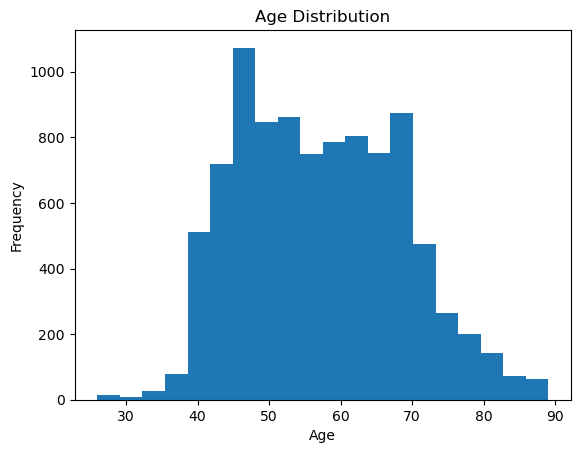

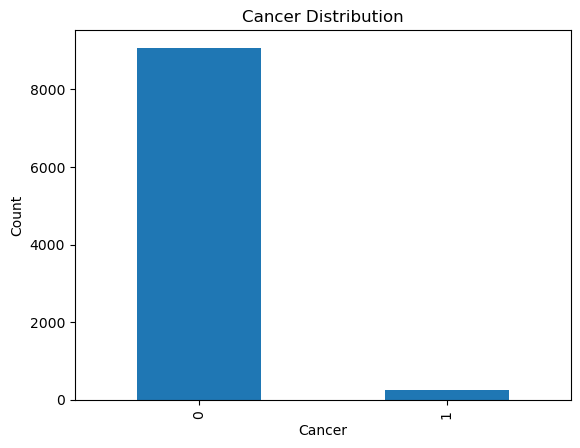

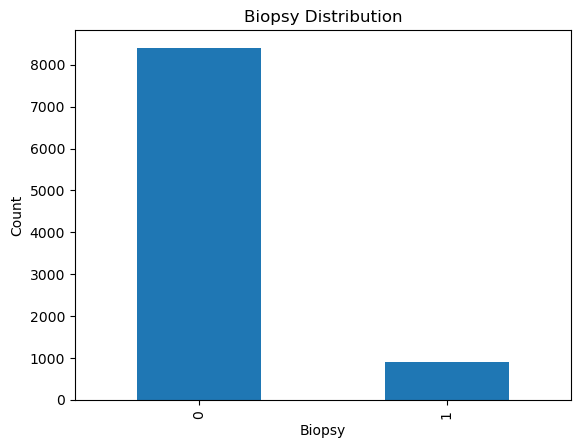

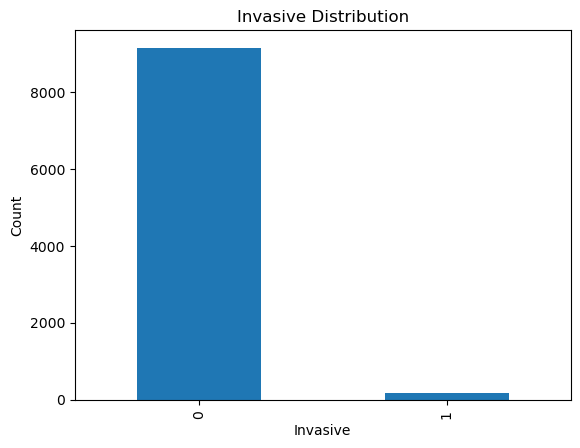

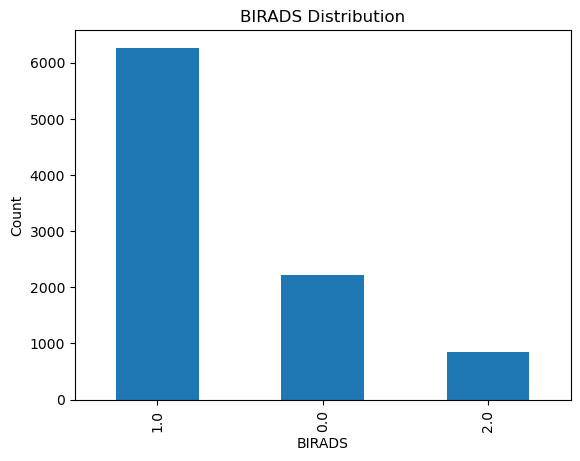

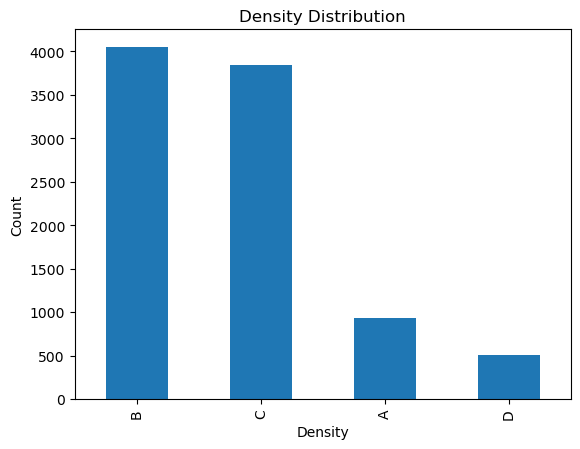

In [57]:
new_df['age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Plotting the cancer distribution
new_df['cancer'].value_counts().plot(kind='bar')
plt.xlabel('Cancer')
plt.ylabel('Count')
plt.title('Cancer Distribution')
plt.show()

# Plotting the biopsy distribution
new_df['biopsy'].value_counts().plot(kind='bar')
plt.xlabel('Biopsy')
plt.ylabel('Count')
plt.title('Biopsy Distribution')
plt.show()

# Plotting the invasive distribution
new_df['invasive'].value_counts().plot(kind='bar')
plt.xlabel('Invasive')
plt.ylabel('Count')
plt.title('Invasive Distribution')
plt.show()

# Plotting the BIRADS distribution
new_df['birads'].value_counts().plot(kind='bar')
plt.xlabel('BIRADS')
plt.ylabel('Count')
plt.title('BIRADS Distribution')
plt.show()

# Plotting the density distribution
new_df['density'].value_counts().plot(kind='bar')
plt.xlabel('Density')
plt.ylabel('Count')
plt.title('Density Distribution')
plt.show()

In [51]:
new_df.to_csv('/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/data_csv/train_folds_details.csv', index=False)

In [50]:
new_df.shape

(9321, 14)

In [20]:
new_df.rename(columns={
    'image_ids': 'image', 
    'cc_image_paths': 'CC',
    'mlo_image_paths': 'MLO',
    'views': 'view',
}, inplace=True)

# Display the first few rows to verify the column name changes
new_df['patient_id_laterality'] = new_df['patient_id'].astype(str) + '_' + new_df['laterality']
new_df.head(5)


,patient_id,laterality,CC,MLO,image,view,fold,text,patient_id_laterality
0,25,L,[1789648218],[1442180348],"[1442180348, 1789648218]","[MLO, CC]",1,"[Procedure Reported: Digital mammography, bot...",25_L
1,25,R,"[822390278, 1997933901]","[1723979573, 1962456803]","[822390278, 1723979573, 1962456803, 1997933901]","[CC, MLO, MLO, CC]",1,"[Procedure Reported: Digital mammography, bot...",25_R
2,28,L,[825270681],[1113093954],"[825270681, 1113093954]","[CC, MLO]",3,"[Procedure Reported: Digital mammography, bot...",28_L
3,33,L,[995020214],[2057464302],"[995020214, 2057464302]","[CC, MLO]",1,"[Procedure Reported: Digital mammography, bot...",33_L
4,33,R,"[567858385, 1863578666]",[1579089732],"[567858385, 1579089732, 1863578666]","[CC, MLO, CC]",1,"[Procedure Reported: Digital mammography, bot...",33_R


In [21]:
df_final = new_df
# Convert the string representations of the lists into actual lists
df_final['view'] = df_final['view'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_final['image'] = df_final['image'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define a function to reorder based on 'CC' and 'MLO' sequence and adjust other columns accordingly
def reorder_sequence(row):
    # Create a mapping of view to index
    view_index_map = {'CC': 0, 'MLO': 1}
    # Initialize the new order for views and related columns
    new_order = ['CC', 'MLO']
    new_image = [None, None]

    # Go through the existing views and place the items in the correct order
    for i, view in enumerate(row['view']):
        index = view_index_map.get(view)
        if index is not None:
            new_image[index] = row['image'][i]

    # Assign the reordered lists back to the row
    row['view'] = new_order
    row['image'] = new_image

    return row

# Apply the reordering function to each row
df_final = df_final.apply(reorder_sequence, axis=1)


In [22]:
df_final

,patient_id,laterality,CC,MLO,image,view,fold,text,patient_id_laterality
0,25,L,[1789648218],[1442180348],"[1789648218, 1442180348]","[CC, MLO]",1,"[Procedure Reported: Digital mammography, bot...",25_L
1,25,R,"[822390278, 1997933901]","[1723979573, 1962456803]","[1997933901, 1962456803]","[CC, MLO]",1,"[Procedure Reported: Digital mammography, bot...",25_R
2,28,L,[825270681],[1113093954],"[825270681, 1113093954]","[CC, MLO]",3,"[Procedure Reported: Digital mammography, bot...",28_L
3,33,L,[995020214],[2057464302],"[995020214, 2057464302]","[CC, MLO]",1,"[Procedure Reported: Digital mammography, bot...",33_L
4,33,R,"[567858385, 1863578666]",[1579089732],"[1863578666, 1579089732]","[CC, MLO]",1,"[Procedure Reported: Digital mammography, bot...",33_R
...,...,...,...,...,...,...,...,...,...
9316,65495,L,[1435151627],[161429092],"[1435151627, 161429092]","[CC, MLO]",1,"[Procedure Reported: Digital mammography, bot...",65495_L
9317,65495,R,[474938164],[179786992],"[474938164, 179786992]","[CC, MLO]",1,"[Procedure Reported: Digital mammography, bot...",65495_R
9318,65530,R,[1039644878],"[675828643, 1401303823]","[1039644878, 1401303823]","[CC, MLO]",3,"[Procedure Reported: Digital mammography, bot...",65530_R
9319,65534,L,[1436834199],[1888933323],"[1436834199, 1888933323]","[CC, MLO]",0,"[Procedure Reported: Digital mammography, bot...",65534_L


In [23]:
df_final.shape

(9321, 9)

In [ ]:
df_final.to_csv('/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/data_csv/train_folds_final_1.csv', index=False)

In [21]:
df_final = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/data_csv/train_folds_final_1.csv')

In [23]:
df_final.describe()

,patient_id,fold
count,9321.000000,9321.000000
mean,32744.740371,1.496084
std,18871.569839,1.117559
min,25.000000,0.000000
25%,16735.000000,0.000000
50%,32329.000000,1.000000
75%,49102.000000,2.000000
max,65534.000000,3.000000


In [25]:
df_final.head(5)

,patient_id,laterality,CC,MLO,image,view,fold,text,patient_id_laterality
0,25,L,[1789648218],[1442180348],"[1789648218, 1442180348]","['CC', 'MLO']",1,"['Procedure Reported: Digital mammography, bo...",25_L
1,25,R,"[822390278, 1997933901]","[1723979573, 1962456803]","[1997933901, 1962456803]","['CC', 'MLO']",1,"['Procedure Reported: Digital mammography, bo...",25_R
2,28,L,[825270681],[1113093954],"[825270681, 1113093954]","['CC', 'MLO']",3,"['Procedure Reported: Digital mammography, bo...",28_L
3,33,L,[995020214],[2057464302],"[995020214, 2057464302]","['CC', 'MLO']",1,"['Procedure Reported: Digital mammography, bo...",33_L
4,33,R,"[567858385, 1863578666]",[1579089732],"[1863578666, 1579089732]","['CC', 'MLO']",1,"['Procedure Reported: Digital mammography, bo...",33_R


## BIRADs template for RSNA

BI-RADS Assessment Descriptions and Follow-Up Recommendations
BI-RADS 0: Need Additional Imaging Evaluation. Follow-up imaging is recommended to clarify or confirm the findings.
BI-RADS 1: Negative. Routine screening recommended.
BI-RADS 2: Benign Findings. Routine screening recommended.

Procedure Reported:
Digital mammography, both breasts. Laterality: L, View: CC.
Findings:
Breast Density: {density} (Note: A - least dense, D - most dense. Dense breast tissue can make mammography more challenging.)
Cancer Presence: {cancer} (Note: '0' indicates no cancer detected, '1' indicates cancer detected.)
Biopsy Performed: {biopsy} (Note: '0' indicates no biopsy performed, '1' indicates biopsy performed.)
Invasive Cancer: {invasive} (Note: Applicable if cancer is present. '0' indicates non-invasive, '1' indicates invasive cancer.)
Difficult Negative Case: {difficult_negative_case} (Note: 'False' indicates a standard case, 'True' indicates a difficult negative case.)

BI-RADS Assessment:
- Category {BIRADS}: {BIRADS_Assessment_Description}

In [4]:
def generate_description(row):
    density_mapping = {
        'A': 'Almost entirely fatty: The breasts are composed of mostly fatty tissue.',
        'B': 'Scattered fibroglandular densities: There are scattered areas of dense fibroglandular tissue.',
        'C': 'Heterogeneously dense: The breasts have heterogeneously dense tissue, which may obscure small masses.',
        'D': 'Extremely dense: The breasts are extremely dense, which may lower the sensitivity of mammography.'
    }
    BIRADS = row['BIRADS']
    BIRADS_Assessment_Description = {
        0: 'Incomplete: Need additional imaging evaluation.',
        1: 'Negative: No mammographic evidence of malignancy.',
        2: 'Benign: No mammographic evidence of malignancy.',
        3: 'Probably benign: <2% risk of malignancy.',
        4: 'Suspicious: 2-94% risk of malignancy.',
        5: 'Highly suggestive of malignancy: >95% risk of malignancy.',
        6: 'Known biopsy-proven malignancy.'
    }.get(BIRADS, '[Not provided]')
    cancer = 'Cancer present' if row['cancer'] == 1 else 'No cancer present'
    biopsy = 'Biopsy performed' if row['biopsy'] == 1 else 'No biopsy performed'
    invasive = 'Invasive cancer' if row['invasive'] == 1 else 'Non-invasive cancer'
    density_description = density_mapping.get(row['density'], '[Not provided]')
    difficult_negative_case = 'A difficult negative case' if row['difficult_negative_case'] == 1 else ''
    
    # Fill None values with a specified value
    laterality = row['laterality'] if row['laterality'] is not None else '[Not provided]'
    view = row['view'] if row['view'] is not None else '[Not provided]'
    age = row['age'] if row['age'] is not None else '[Not provided]'
    
    report =f"""Procedure Reported: \nDigital mammography, both breasts. Laterality: {laterality}, View: {view} .\n
Breast Composition: {density_description} \n
Imression:
{cancer} 
{biopsy} 
{invasive}
{difficult_negative_case}
BI-RADS Assessment:
- Category {BIRADS}: {BIRADS_Assessment_Description} """
    return report


In [5]:
df.sample(3)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,fold
17314,2,28321,2038934866,L,CC,51.0,0,0,0,NaN,0,NaN,29,False,3
33065,2,454,1185839362,L,MLO,50.0,0,0,0,NaN,0,NaN,29,False,2
51718,1,6775,561367594,R,CC,60.0,0,0,0,1.0,0,A,49,False,3


In [6]:
df_sample = df_filtered.sample(3)  # Select the first 5 rows as a sample
descriptions = df_sample.apply(generate_description, axis=1)
print(list(descriptions)[1])

Procedure Reported: 
Digital mammography, both breasts. Laterality: R, View: CC .

Breast Composition: Heterogeneously dense: The breasts have heterogeneously dense tissue, which may obscure small masses. 

Findings:
No cancer present 
No biopsy performed 
Non-invasive cancer

BI-RADS Assessment:
- Category 1.0: Negative: No mammographic evidence of malignancy. 


## Check if Imagetext dataset works with RSNA 

In [2]:
%cd '../mammo-clip-github/Mammo-CLIP/src/codebase/'
from breastclip.data.datasets import ImageTextDataset

/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase


INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.11 (you have 1.4.7). Upgrade using: pip install --upgrade albumentations
/home/devam/miniconda3/envs/Mammo-CLIP/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
 valid_dataset = load_dataset(
                df=valid_df,
                split="valid",
                dataset=data_config[dataset]["name"],
                data_dir=data_config[dataset]["data_dir"],
                image_dir=data_config[dataset]["img_dir"],
                data_type=data_config[dataset]["data_type"],
                tokenizer=self.tokenizer,
                transform_config=transform_config,
                loss_config=self.loss_config,
                text_max_length=data_config[dataset]["text_max_length"],
                mean=mean,
                std=std,
                image_encoder_type=self.image_encoder_type,
                label_col=data_config[dataset]["label_col"] if "label_col" in data_config[dataset] else None,
                label_text=data_config[dataset]["label_text"] if "label_text" in data_config[dataset] else None,
            )

In [ ]:
from omegaconf import DictConfig, OmegaConf
import hydra
# @hydra.main(version_base=None, config_path="configs", config_name="train_vit_vindr")

# cfg = hydra.main(config_path="/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/configs/pre_train_b2_clip.yaml")(lambda x: x)()
# cfg = "/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/configs/pre_train_b2_clip.yaml"
OmegaConf.resolve(cfg)

In [ ]:
from hydra.core.hydra_config import HydraConfig
HydraConfig.instance().set_config(cfg)

In [ ]:
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from breastclip import convert_dictconfig_to_dict
with initialize(version_base=None, config_path="../mammo-clip-github/Mammo-CLIP/src/codebase/configs"):
    cfg = compose(config_name="pre_train_b5_clip.yaml")
    print(cfg)

# OmegaConf.to_yaml
cfg = convert_dictconfig_to_dict(cfg)

In [ ]:
python ./Mammo-CLIP/src/codebase/train.py --config-name pre_train_b5_clip.yaml

### Debugging

In [2]:
from transformers import AutoConfig, AutoModel, BertModel
import os


/home/devam/miniconda3/envs/Mammo-CLIP/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from transformers import AutoConfig, AutoModel, BertModel
import os

config_text_encoder = {
    'source': 'huggingface',
    'name': 'emilyalsentzer/Bio_ClinicalBERT',
    'pretrained': True,
    'gradient_checkpointing': False,
    'pooling': 'eos',
    'cache_dir': '/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/outputs/huggingface/',
    'trust_remote_code': True,
    'mlm_head': True
}

# AutoModel.from_pretrained(config_text_encoder['name'], cache_dir=config_text_encoder['cache_dir'])
# 

In [14]:
os.path.exists(os.path.join(config_text_encoder['cache_dir'], f'models--{config_text_encoder["name"].replace("/", "--")}'))

True

In [ ]:
os.environ['TRANSFORMERS_CACHE']

In [15]:
from transformers import AutoModel, AutoConfig, file_utils
cache_dir = file_utils.default_cache_path
print(f"Default cache directory: {cache_dir}")

Default cache directory: /home/devam/.cache/huggingface/hub


In [ ]:




text_encoder = AutoModel.from_pretrained(
                config_text_encoder['name'],
                # vocab_size=vocab_size,
                ignore_mismatched_sizes=True,
                cache_dir=config_text_encoder['cache_dir'],
                local_files_only=os.path.exists(
                os.path.join(config_text_encoder['cache_dir'], f'models--{config_text_encoder["name"].replace("/", "--")}'))
                trust_remote_code=config_text_encoder['trust_remote_code'],
            )

### Linear probing

imports

In [1]:
import pandas as pd
df = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/data_csv/train_folds.csv')

linear probe command with efficientnet b5 arch on BIRADS classification with RSNA dataset , batch size - 8 

In [ ]:
python ./src/codebase/train_classifier.py 
  --tensorboard-path '/mnt/storage/Devam/mammo-clip-github/tensorboard_logs'
  --checkpoints '/mnt/storage/Devam/mammo-clip-github/checkpoints'
  --output_path '/mnt/storage/Devam/mammo-clip-github/output'
  --data-dir '/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/' 
  --img-dir 'rsna-stitched-images-512-flipped'  
  --csv-file 'train_folds_rsnalp_final.csv'
  --clip_chk_pt_path "/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar" 
  --data_frac 1.0 
  --dataset 'RSNA' 
  --arch 'upmc_breast_clip_det_b5_period_n_lp' 
  --label "BIRADS" 
  --epochs 30 
  --batch-size 128 
  --num-workers 8 
  --print-freq 10000 
  --log-freq 500 
  --running-interactive 'n'  
  --n_folds 1 
  --lr 5.0e-5 
  --weighted-BCE 'y' 
  --balanced-dataloader 'n'

In [9]:
import pandas as pd
df = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/new-splits-csvs-BIRADS/binary_train_folds_rsnalp_final.csv')
df.BIRADS.value_counts()

BIRADS
1.0    11570
0.0     8647
Name: count, dtype: int64

BIRADS BINARY

In [ ]:
python ./src/codebase/train_classifier.py 
  --tensorboard-path '/mnt/storage/Devam/mammo-clip-github/tensorboard_logs'
  --checkpoints '/mnt/storage/Devam/mammo-clip-github/checkpoints'
  --output_path '/mnt/storage/Devam/mammo-clip-github/output'
  --data-dir '/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/' 
  --img-dir 'rsna-stitched-images-512-flipped'  
  --csv-file 'new-splits-csvs-BIRADS/binary_train_folds_rsnalp_final.csv'
  --clip_chk_pt_path "/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar" 
  --data_frac 1.0 
  --dataset 'RSNA' 
  --arch 'upmc_breast_clip_det_b5_period_n_lp' 
  --label "BIRADS" 
  --epochs 30 
  --batch-size 128 
  --num-workers 8 
  --print-freq 10000 
  --log-freq 500 
  --running-interactive 'n'  
  --n_folds 1 
  --lr 5.0e-5 
  --weighted-BCE 'y' 
  --balanced-dataloader 'n'
  --VER 'BIN'

test

In [ ]:
python ./src/codebase/train_classifier.py 
  --tensorboard-path '/mnt/storage/Devam/mammo-clip-github/tensorboard_logs'
  --checkpoints '/mnt/storage/Devam/mammo-clip-github/checkpoints'
  --output_path '/mnt/storage/Devam/mammo-clip-github/output'
  --data-dir '/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/' 
  --img-dir 'rsna-stitched-images-512-flipped'  
  --csv-file 'new-splits-csvs-density/test_folds_rsnalp_final.csv'
  --clip_chk_pt_path "/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar" 
  --data_frac 1.0 
  --dataset 'RSNA' 
  --arch 'upmc_breast_clip_det_b5_period_n_lp' 
  --label "density" 
  --epochs 30 
  --batch-size 128 
  --num-workers 8 
  --print-freq 100 
  --log-freq 500 
  --running-interactive 'n'
  --start-fold 2  
  --n_folds 3 
  --lr 5.0e-5 
  --weighted-BCE 'y' 
  --balanced-dataloader 'n'
  --inference-mode 'y'

train mlo

In [ ]:
python ./src/codebase/train_classifier.py   --tensorboard-path '/mnt/storage/Devam/mammo-clip-github/tensorboard_logs_mlo'  --checkpoints '/mnt/storage/Devam/mammo-clip-github/checkpoints'  --output_path '/mnt/storage/Devam/mammo-clip-github/output-MLO'  --data-dir '/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/'   --img-dir 'rsna-stitched-images-512-flipped'    --csv-file 'new-splits-csvs-density/MLO_only/train_folds_rsnalp_final.csv'  --clip_chk_pt_path "/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar"   --data_frac 1.0   --dataset 'RSNA'   --arch 'upmc_breast_clip_det_b5_period_n_lp'   --label "density"   --epochs 30   --batch-size 128   --num-workers 8   --print-freq 10000   --log-freq 500   --running-interactive 'n'  --n_folds 1  --lr 5.0e-5   --weighted-BCE 'y'   --balanced-dataloader 'n'  --inference-mode 'n' --device cuda:1 --VER '084MLO'

test mlo

In [ ]:
python ./src/codebase/train_classifier.py 
  --tensorboard-path '/mnt/storage/Devam/mammo-clip-github/tensorboard_logs'
  --checkpoints '/mnt/storage/Devam/mammo-clip-github/checkpoints'
  --output_path '/mnt/storage/Devam/mammo-clip-github/output-MLO'
  --data-dir '/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/' 
  --img-dir 'rsna-stitched-images-512-flipped'  
  --csv-file 'new-splits-csvs-density/MLO_only/test_folds_rsnalp_final.csv'
  --clip_chk_pt_path "/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar" 
  --data_frac 1.0 
  --dataset 'RSNA' 
  --arch 'upmc_breast_clip_det_b5_period_n_lp' 
  --label "density" 
  --epochs 30 
  --batch-size 128 
  --num-workers 8 
  --print-freq 100 
  --log-freq 500 
  --running-interactive 'n'
  --start-fold 2  
  --n_folds 3 
  --lr 5.0e-5 
  --weighted-BCE 'y' 
  --balanced-dataloader 'n'
  --inference-mode 'y'
  --VER '084MLO'

Density

In [ ]:
python ./src/codebase/train_classifier.py 
  --tensorboard-path '/mnt/storage/Devam/mammo-clip-github/tensorboard_logs'
  --checkpoints '/mnt/storage/Devam/mammo-clip-github/checkpoints'
  --output_path '/mnt/storage/Devam/mammo-clip-github/output'
  --data-dir '/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/' 
  --img-dir 'rsna-stitched-images-512-flipped'  
  --csv-file 'new-splits-csvs-density/train_folds_rsnalp_final.csv'
  --clip_chk_pt_path "/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar" 
  --data_frac 1.0 
  --dataset 'RSNA' 
  --arch 'upmc_breast_clip_det_b5_period_n_lp' 
  --label "density" 
  --epochs 30 
  --batch-size 128 
  --num-workers 8 
  --print-freq 10000 
  --log-freq 500 
  --running-interactive 'n'
  --n_folds 1
  --lr 5.0e-5 
  --weighted-BCE 'y' 
  --balanced-dataloader 'n'
  --inference-mode 'n'

In [27]:
import argparse
from Datasets.dataset_utils import get_dataloader_RSNA
import pandas as pd
from pathlib import Path

# Define the dictionary
args_dict = {
    'tensorboard_path': '/mnt/storage/Devam/mammo-clip-github/tensorboard_logs',
    'checkpoints': '/mnt/storage/Devam/mammo-clip-github/checkpoints',
    'output_path': '/mnt/storage/Devam/mammo-clip-github/output',
    'data_dir': '/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/',
    'img_dir': 'rsna-stitched-images-512-flipped',
    'csv_file': 'train_folds_rsnalp_final.csv',
    'clip_chk_pt_path': '/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar',
    'data_frac': 1.0,
    'dataset': 'RSNA',
    'arch': 'upmc_breast_clip_det_b5_period_n_lp',
    'label': 'BIRADS',
    'epochs': 30,
    'batch_size': 128,
    'num_workers': 8,
    'print_freq': 10000,
    'log_freq': 500,
    'running_interactive': 'n',
    'n_folds': 1,
    'lr': 5.0e-5,
    'model_type': 'Classifier',
    'weighted_BCE': 'y',
    'balanced_dataloader': 'n',
    'img_size': [1920, 512],
    'swin_encoder': 'microsoft/swin-tiny-patch4-window7-224',
    'pretrained_swin_encoder': 'y',
    'swin_model_type': 'y',
    'VER': '084',
    'epochs_warmup': 0,
    'num_cycles': 0.5,
    'alpha': 10,
    'sigma': 15,
    'p': 1.0,
    'mean': 0.3089279,
    'std': 0.25053555408335154,
    'focal_alpha': 0.6,
    'focal_gamma': 2.0,
    'num_classes': 1,
    'start_fold': 0,
    'seed': 10,
    'weight_decay': 1e-4,
    'warmup_epochs': 1,
    'device': 'cuda',
    'apex': 'y',
    'inference_mode': 'n'

}

# Create the static args object
args = argparse.Namespace(**args_dict)
args.data_dir = Path(args.data_dir)
args.mode = 'test'
# args.image_encoder_type = None
# args.valid_folds = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase/data_csv/test_folds_rsnalp_final.csv')
# val_loader = get_dataloader_RSNA(args)


In [14]:
import torch
m = torch.load('/mnt/storage/Devam/mammo-clip-github/checkpoints/RSNA/Classifier/upmc_breast_clip_det_b5_period_n_lp/lr_5e-05_epochs_30_weighted_BCE_y_BIRADS_data_frac_1.0/upmc_breast_clip_det_b5_period_n_lp_seed_10_fold0_best_acc_cancer_ver084.pth')
m.keys()

dict_keys(['model', 'predictions', 'epoch', 'accuracy', 'f1'])

In [31]:
model.load_state_dict(m['model'])

<All keys matched successfully>

#### Checkpoint model

In [5]:
%cd /mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase

/mnt/storage/Devam/mammo-clip-github/Mammo-CLIP/src/codebase


In [21]:
from Classifiers.models.breast_clip_classifier import BreastClipClassifier

In [23]:
ckpt = '/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar'
n_class = 3

In [24]:
import torch
model = torch.load(ckpt,map_location="cpu")

In [ ]:
model['config']

{'base': {'period': 'n',
  'resume_training': False,
  'epoch_to_start': 0,
  'train_fast': False,
  'fold': 0,
  'seed': 10,
  'amp': True,
  'mean': 0.3089279,
  'std': 0.25053555408335154,
  'image_size_h': 1520,
  'image_size_w': 912,
  'text_max_length': 256,
  'loss_best': 'contrastive',
  'data_frac': 1.0,
  'zs_prompts': {'upmc': ['birads category 0', 'birads category 1', 'birads category 2'],
   'rsna': ['no malignancy', 'malignancy']},
  'output': {'args_path': '/ocean/projects/asc170022p/shg121/PhD/Breast-CLIP/src/codebase/outputs/upmc_clip/b5_detector_period_n',
   'checkpoint': '/ocean/projects/asc170022p/shg121/PhD/Breast-CLIP/src/codebase/outputs/upmc_clip/b5_detector_period_n/checkpoints/',
   'tensorboard': '/ocean/projects/asc170022p/shg121/PhD/Breast-CLIP/src/codebase/outputs/upmc_clip/b5_detector_period_n/tensorboard/'}},
 'data_train': {'upmc_wo_period': {'name': 'upmc',
   'data_type': 'imagetext',
   'data_dir': '/ocean/projects/asc170022p/shg121/PhD/RSNA_Breast_

In [28]:
model = BreastClipClassifier(ckpt=model, n_class=n_class,args=args)


{'source': 'cnn', 'name': 'tf_efficientnet_b5_ns-detect', 'pretrained': True, 'model_type': 'cnn'}
<All keys matched successfully>
Loaded pretrained weights for efficientnet-b5
freezing image encoder to not be trained


In [ ]:
model["config"]["model"]["image_encoder"]

{'source': 'cnn',
 'name': 'tf_efficientnet_b5_ns-detect',
 'pretrained': True,
 'model_type': 'cnn'}

### Dataset folds, splits  train val and test.

In [6]:
birads_distribution = df.groupby('fold')['BIRADS'].value_counts()
print(birads_distribution)

fold  BIRADS
0     1.0       3919
      0.0       2059
      2.0        570
1     1.0       3937
      0.0       2039
      2.0        550
2     1.0       3952
      0.0       2047
      2.0        576
3     1.0       3964
      0.0       2104
      2.0        569
Name: count, dtype: int64


In [7]:
df.fold.value_counts()

fold
3    13766
0    13682
2    13646
1    13612
Name: count, dtype: int64

In [22]:
df.dropna(subset=['BIRADS'])['fold'].value_counts()

fold
3    6637
2    6575
0    6548
1    6526
Name: count, dtype: int64

In [11]:
df.dropna(subset=['BIRADS']).shape

(26286, 15)

check all patients in different folds

In [23]:
df.groupby('patient_id')['fold'].nunique()

patient_id
5        1
25       1
28       1
30       1
33       1
        ..
65518    1
65525    1
65526    1
65530    1
65534    1
Name: fold, Length: 11913, dtype: int64

Load stitched images csv/df .

In [2]:
df_bilat = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/rsna_stitched_images-flipped.csv')

In [4]:
df_bilat['fold'] = 1

In [5]:
df_bilat['fold'] = df_bilat['patient_id'].apply(lambda x: df[df['patient_id'] == x]['fold'].iloc[0])

In [79]:
print( df_bilat['BIRADS'].value_counts())

BIRADS
1.0    10694
0.0     9661
2.0     2185
Name: count, dtype: int64


In [82]:
print("dist before dropping : \n"  , df_bilat['fold'].value_counts(), "\n after dropping \n", df_bilat.dropna(subset=['BIRADS'])['fold'].value_counts())

dist before dropping : 
 fold
3    8421
0    8307
2    8238
1    8148
Name: count, dtype: int64 
 after dropping 
 fold
3    5783
0    5656
2    5600
1    5501
Name: count, dtype: int64


#### Drop and split data frame

80,10,10 split

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Drop rows where 'BIRADS' is NaN
df_bilat_clean = df_bilat.dropna(subset=['BIRADS'])

# Get unique patient IDs
unique_patient_ids = df_bilat_clean['patient_id'].unique()

# Calculate sizes for train, validation, and test sets
total_patients = len(unique_patient_ids)
train_size = int(0.8 * total_patients)
val_size = int(0.1 * total_patients)
test_size = total_patients - train_size - val_size  # The rest will go to test

# Split patient IDs into train, validation, and test sets
train_patient_ids, remaining_patient_ids = train_test_split(unique_patient_ids, train_size=train_size, random_state=42)
test_patient_ids, val_patient_ids = train_test_split(remaining_patient_ids, test_size=test_size, random_state=42)

# Assign folds based on patient IDs
train_df = df_bilat_clean[df_bilat_clean['patient_id'].isin(train_patient_ids)].copy()
val_df = df_bilat_clean[df_bilat_clean['patient_id'].isin(val_patient_ids)].copy()
test_df = df_bilat_clean[df_bilat_clean['patient_id'].isin(test_patient_ids)].copy()

# Assign new folds
train_df['fold'] = 1
val_df['fold'] = 0
test_df['fold'] = 2

df_train = pd.concat([train_df,val_df])

# Output value counts to verify
print(val_df['fold'].value_counts())
print(test_df['fold'].value_counts())
print(train_df['fold'].value_counts())

# Check for patient ID leakage
train_patients = set(train_df['patient_id'])
val_patients = set(val_df['patient_id'])
test_patients = set(test_df['patient_id'])
# leaked_patients = train_patients.intersection(val_patients, test_patients)
# print(f"Number of leaked patients: {len(leaked_patients)}")
leaked_patients = train_patients.intersection(val_patients).union(train_patients.intersection(test_patients)).union(val_patients.intersection(test_patients))
print(f"Number of leaked patients: {len(leaked_patients)}")

fold
0    2207
Name: count, dtype: int64
fold
2    2323
Name: count, dtype: int64
fold
1    18010
Name: count, dtype: int64
Number of leaked patients: 0


In [32]:
df_train.to_csv('/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/new-splits-csvs/train_folds_rsnalp_final.csv', index=False)
test_df.to_csv('/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/new-splits-csvs/test_folds_rsnalp_final.csv', index=False)


 70 30 30 split

In [10]:
# Split the data into train, validation, and test sets
df_bilat_clean = df_bilat.dropna(subset=['BIRADS'])
train_df = df_bilat_clean[df_bilat_clean['fold'].isin([0, 1, 2])]
test_df = df_bilat_clean[df_bilat_clean['fold'] == 3].sample(frac=0.5, random_state=42)
val_df = df_bilat_clean[df_bilat_clean['fold'] == 3].drop(test_df.index)
train_df['fold'] = 1
val_df['fold'] = 0
test_df['fold'] = 2
df_train = pd.concat([train_df,val_df])
print(val_df['fold'].value_counts(), test_df['fold'].value_counts(), train_df['fold'].value_counts())
# Check for patient ID leakage
train_patients = set(train_df['patient_id'])
val_patients = set(val_df['patient_id'])
test_patients = set(test_df['patient_id'])

leaked_patients = train_patients.intersection(val_patients, test_patients)
print("Leaked patients:", list(leaked_patients))

print("Train set shape:", train_df.shape[0])
print("Validation set shape:", val_df.shape[0])
print("Test set shape:", test_df.shape[0])



fold
0    2891
Name: count, dtype: int64 fold
2    2892
Name: count, dtype: int64 fold
1    16757
Name: count, dtype: int64
Leaked patients: []
Train set shape: 16757
Validation set shape: 2891
Test set shape: 2892


/tmp/ipykernel_2658092/154039378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['fold'] = 1


#### save to csv


In [119]:
df_train.to_csv('/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/train_folds_rsnalp_final.csv', index=False)

In [120]:
test_df.to_csv('/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/test_folds_rsnalp_final.csv', index=False)

In [3]:
df_train = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/train_folds_rsnalp_final.csv')
test_df = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/test_folds_rsnalp_final.csv')

In [15]:
print(df_train['BIRADS'].value_counts(),test_df.BIRADS.value_counts())

BIRADS
1.0    9366
0.0    8388
2.0    1894
Name: count, dtype: int64 BIRADS
1.0    1328
0.0    1273
2.0     291
Name: count, dtype: int64


In [17]:
import pickle

# Specify the path to the config pickle file
config_file = '/mnt/storage/Devam/mammo-clip-github/output/RSNA/zz/Classifier/upmc_breast_clip_det_b5_period_n_lp/lr_5e-05_epochs_30_weighted_BCE_y_BIRADS_data_frac_1.0/seed_10_train_configs.pkl'

# Read the config pickle file
with open(config_file, 'rb') as f:
    config = pickle.load(f)

# Access the config variables
# Example: print the value of a variable named 'model_type'
print(config)

Namespace(VER='084', alpha=10, apex=True, arch='upmc_breast_clip_det_b5_period_n_lp', balanced_dataloader='n', batch_size=128, checkpoints='/mnt/storage/Devam/mammo-clip-github/checkpoints', chk_pt_path=PosixPath('/mnt/storage/Devam/mammo-clip-github/checkpoints/RSNA/Classifier/upmc_breast_clip_det_b5_period_n_lp/lr_5e-05_epochs_30_weighted_BCE_y_BIRADS_data_frac_1.0'), clip_chk_pt_path='/mnt/storage/Devam/mammo-clip-github/b5-model-best-epoch-7.tar', csv_file='test_folds_rsnalp_final.csv', data_dir='/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/', data_frac=1.0, dataset='RSNA', detector_threshold=0.1, device='cuda', epochs=30, epochs_warmup=0, focal_alpha=0.6, focal_gamma=2.0, img_dir='rsna-stitched-images-512-flipped', img_size=[1520, 912], inference_mode='y', label='BIRADS', log_freq=500, lr=5e-05, mean=0.3089279, model_type='Classifier', n_folds=3, num_classes=1, num_cycles=0.5, num_workers=8, output_path=PosixPath('/mnt/storage/Devam/mammo-clip-github/output/RSNA/

#### check patients 

In [97]:
train_df['patient_id'].nunique()

8931

In [98]:
len(set(train_df['patient_id'].unique()) - set(val_df['patient_id'].unique()))

4312

Missing patients ? 

In [66]:
len(set(df['patient_id']) - set(df_bilat['patient_id']))

31

In [65]:
df_corrected = pd.read_csv('/mnt/storage/Devam/mammo-clip-github/image_preprocessing-aisha/train_corrected.csv')
df_corrected['updated_lat'] = df_corrected.apply(lambda x: 'R' if x['incorrect_laterality'] == True and x['laterality'] == 'L' else ('L' if x['incorrect_laterality'] == True and x['laterality'] == 'R' else x['laterality']), axis=1)
df_corrected[df_corrected['patient_id'].isin(list(set(df['patient_id']) - set(df_bilat['patient_id'])))].groupby(['patient_id','view'])['updated_lat'].nunique()

patient_id  view
886         CC      1
            MLO     1
7002        CC      1
            MLO     1
7927        CC      1
                   ..
59884       MLO     1
60981       CC      1
            MLO     1
63890       CC      1
            MLO     1
Name: updated_lat, Length: 63, dtype: int64

31 Patients with only one laterality present.